# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [22]:
#Carregando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#recurso interativo do matplotlib

In [2]:
# 1) Carregando base de dados
df = pd.read_csv('sinasc_RO_2019.csv')
df

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915


# Tratamento dos Dados





In [23]:
# Tipo e dados faltantes das variáveis de interesse APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE, CONSULTAS.
var = df.loc[:,['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS']]
print(var.dtypes)
var.isna().sum()

APGAR1       float64
APGAR5       float64
SEXO          object
GESTACAO      object
ESTCIVMAE    float64
CONSULTAS      int64
dtype: object


APGAR1       0
APGAR5       0
SEXO         0
GESTACAO     0
ESTCIVMAE    0
CONSULTAS    0
dtype: int64

In [24]:
# Tratamento dos dados das variáveis:
df.dropna(subset=('APGAR1', 'APGAR5'),inplace=True) # Dados faltantes nas variaveis 'APGAR5','APGAR1' não podem ser encaixados em outra categoria pois segundo o SINASC não podemos presumir, e por isso serão excluídos.
df['SEXO'].fillna(0,inplace=True) # Dados faltantes da variável 'SEXO' substituídos por 0, de acordo com o dicionário da SINASC significa ignorado.
df['GESTACAO'].fillna('Ignorado',inplace=True) # Dados faltantes da variável 'GESTACAO',substituídos por 9, de acordo com o dicionário da SINASC significa ignorado.
df['ESTCIVMAE'].fillna(9,inplace=True) # Dados faltantes da variável 'ESTCIVMAE',substituídos por 9, de acordo com o dicionário da SINASC significa ignorado.
df['ESTCIVMAE'].replace(5, 1,inplace=True) # De acordo com o dicionário de dados da SINASC a categoria 5 da variável'ESTCIVMAE' foi atualizada a partir de 2005 e como diz a lei, passado para cat 1(solteira). 
var.isna().sum()

APGAR1       0
APGAR5       0
SEXO         0
GESTACAO     0
ESTCIVMAE    0
CONSULTAS    0
dtype: int64

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

([<matplotlib.axis.YTick at 0x2c9cb72f100>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

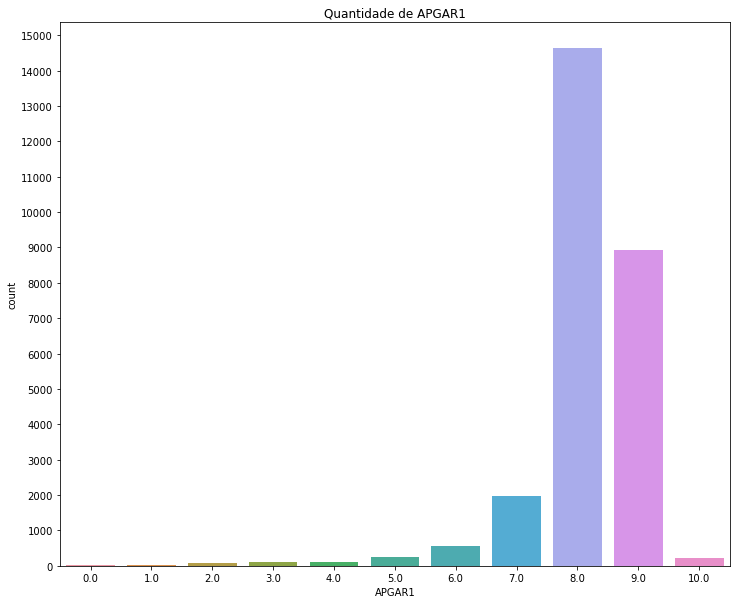

In [25]:
plt.rc('figure', figsize=(12, 10))
sns.countplot(x='APGAR1', data=df).set_title('Quantidade de APGAR1')
plt.yticks(range(0,16000,1000))

([<matplotlib.axis.YTick at 0x2c9c98d2910>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

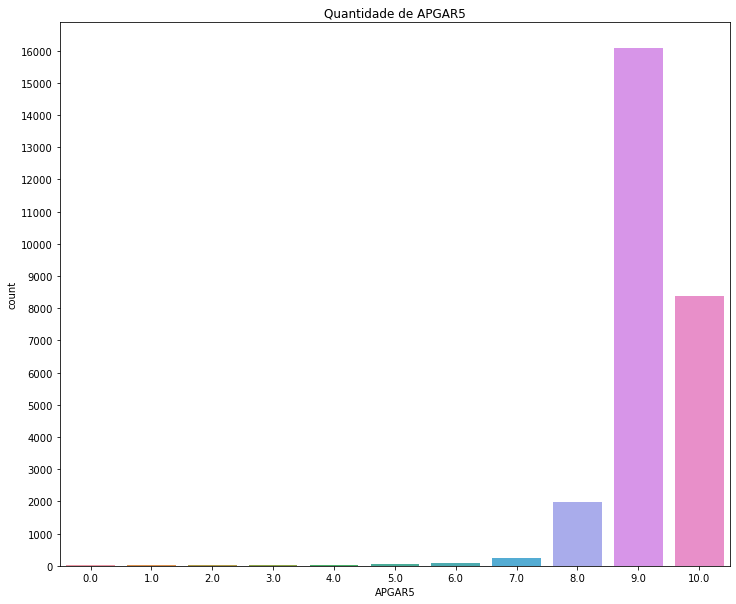

In [6]:
sns.countplot(x='APGAR5', data=df).set_title('Quantidade de APGAR5')
plt.yticks(range(0,17000,1000))

([<matplotlib.axis.YTick at 0x2c9c8f53460>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

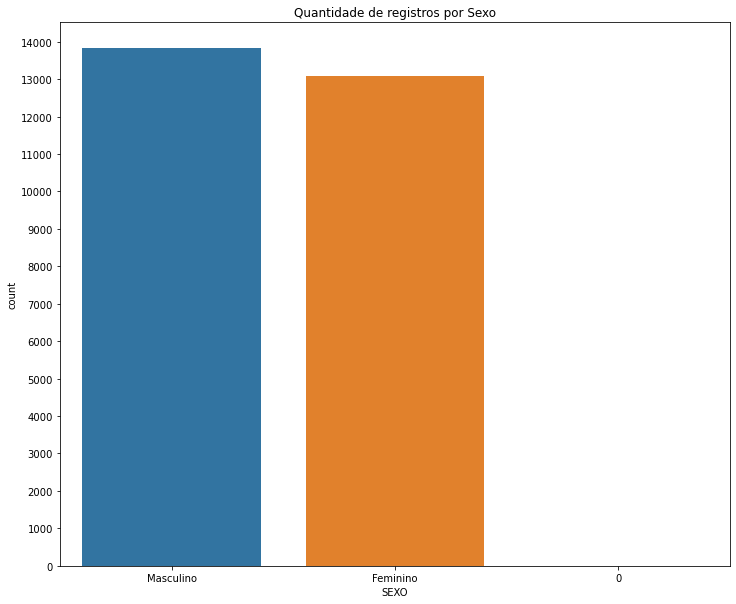

In [7]:
sns.countplot(x='SEXO', data=df).set_title('Quantidade de registros por Sexo')
plt.yticks(range(0,15000,1000))

([<matplotlib.axis.YTick at 0x2c9c96ff4c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

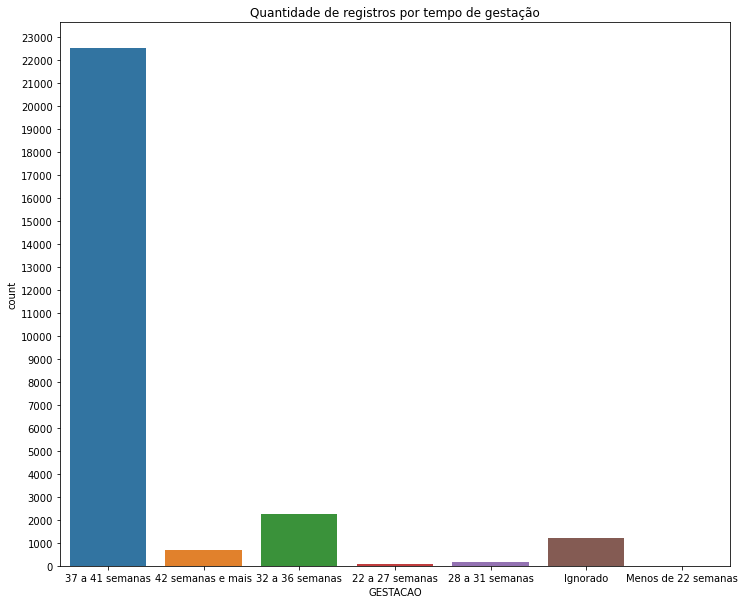

In [8]:
sns.countplot(x='GESTACAO', data=df).set_title('Quantidade de registros por tempo de gestação')
plt.yticks(range(0,24000,1000))


([<matplotlib.axis.YTick at 0x2c9c978d520>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

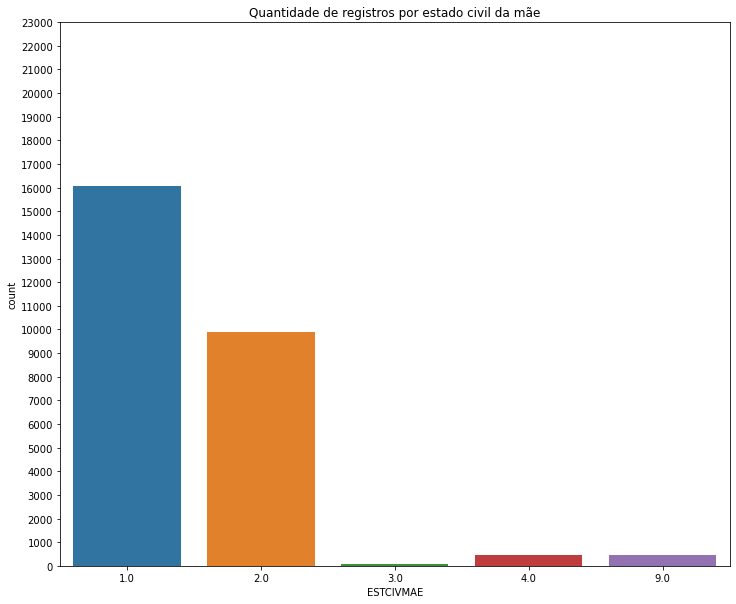

In [9]:
ax = sns.countplot(x='ESTCIVMAE', data=df).set_title('Quantidade de registros por estado civil da mãe')
plt.yticks(range(0,24000,1000))


([<matplotlib.axis.YTick at 0x2c9c980fa60>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

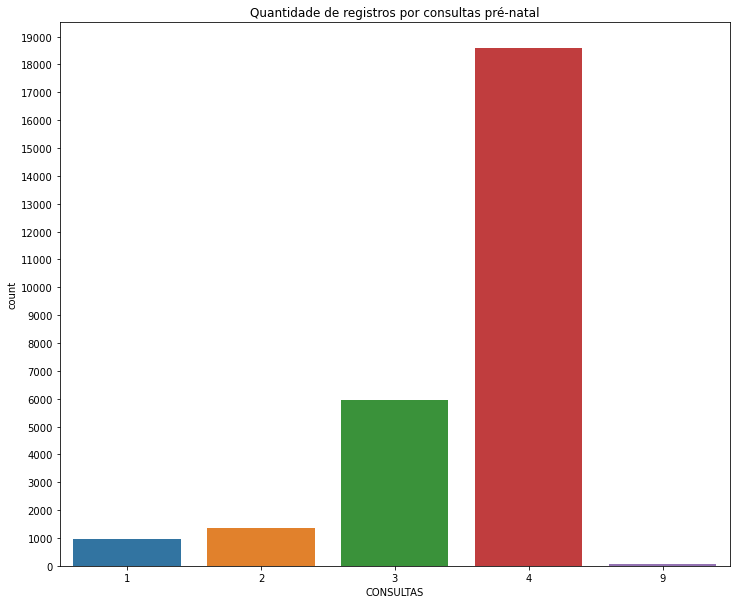

In [10]:
sns.countplot(x='CONSULTAS', data=df).set_title('Quantidade de registros por consultas pré-natal')
plt.yticks(range(0,20000,1000))


#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

Text(0.5, 1.0, 'Relação entre o APGAR5 médio e consultas')

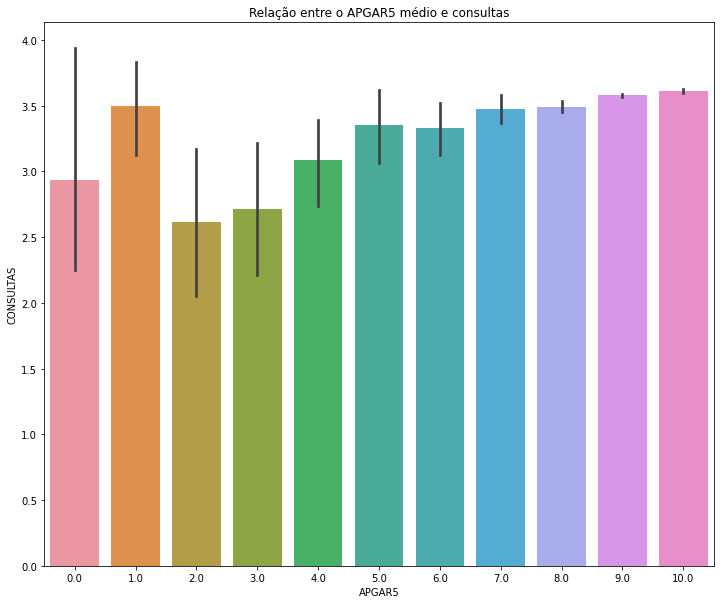

In [11]:
sns.barplot(x='APGAR5', y='CONSULTAS', data= df).set_title('Relação entre o APGAR5 médio e consultas')

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

<AxesSubplot:xlabel='SEXO', ylabel='count'>

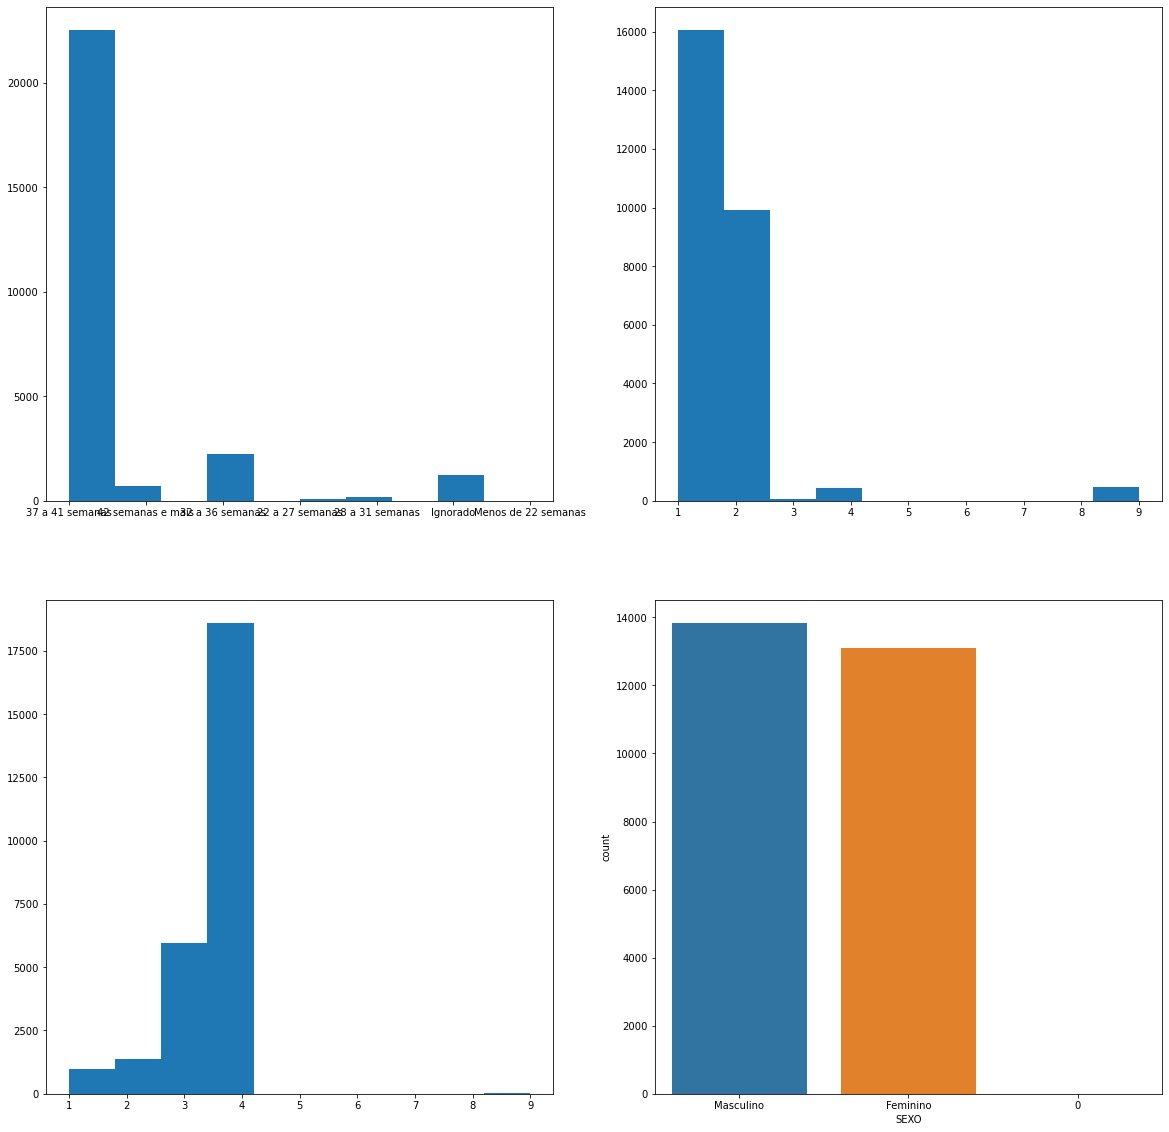

In [20]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.hist(x='GESTACAO',data=df)
ax2.hist(x='ESTCIVMAE',data=df)
ax3.hist(x='CONSULTAS',data=df)
sns.countplot(x='SEXO',data=df)